<a href="https://colab.research.google.com/github/carlosbate/StockX-Database/blob/main/Stockx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inspiration

What shoes are most popular?

Which shoes have the best/worst profit margins?

What factors affect profit margin?

Is it possible to predict the sale price of a shoe at a given time? (i.e. when should I sell?)


**Importing the libraries that i'm gonna use**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

**Exploring the CSV file**

In [ ]:
df = pd.read_csv("/content/StockX-Data-Contest-2019-3.csv")
df.head(5)

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


**Check data type**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


**Normalizing data**

In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Release Date"] = pd.to_datetime(df["Release Date"])

df["Sale Price"] = df["Sale Price"].apply(lambda x: x.replace("$",""))
df["Sale Price"] = df["Sale Price"].apply(lambda x: x.replace(",",""))
df["Sale Price"] = df["Sale Price"].astype("float")

df["Retail Price"] = df["Retail Price"].apply(lambda x: x.replace("$",""))
df["Retail Price"] = df["Retail Price"].apply(lambda x: x.replace(",",""))
df["Retail Price"] = df["Retail Price"].astype("float")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    99956 non-null  datetime64[ns]
 1   Brand         99956 non-null  object        
 2   Sneaker Name  99956 non-null  object        
 3   Sale Price    99956 non-null  float64       
 4   Retail Price  99956 non-null  float64       
 5   Release Date  99956 non-null  datetime64[ns]
 6   Shoe Size     99956 non-null  float64       
 7   Buyer Region  99956 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 6.1+ MB


**What shoes are most popular?**

The Yeezys 350 V2: Butter / Beluga / Zebra, are the most popular shoes of this dataset. 

In [ ]:
df[['Sneaker Name']].value_counts().head(5)

Sneaker Name                         
adidas-Yeezy-Boost-350-V2-Butter         11423
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0    10395
Adidas-Yeezy-Boost-350-V2-Zebra          10110
Adidas-Yeezy-Boost-350-V2-Blue-Tint       9297
Adidas-Yeezy-Boost-350-V2-Cream-White     9097
dtype: int64

The most popular Brand is Yeezy

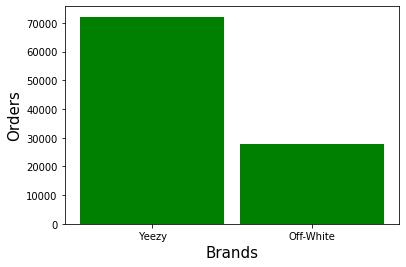

In [ ]:
sneaker_brand = df['Brand'].unique()
total_orders = df['Brand'].value_counts()

fig = plt.figure(figsize = (6, 4))

plt.bar(sneaker_brand, total_orders, color ='g', width = 0.9)

plt.xlabel('Brands', fontsize = 15)
plt.ylabel('Orders', fontsize = 15)

plt.show()

**Which shoes have the best/worst profit margins?**





**Best profit margin**

In [ ]:
df['Profit'] = df['Sale Price'] - df['Retail Price']
df[['Brand', 'Sneaker Name', 'Retail Price', 'Sale Price', 'Profit']].sort_values('Profit', ascending=False).head(10)

,Brand,Sneaker Name,Retail Price,Sale Price,Profit
26870,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,190.0,4050.0,3860.0
43410,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,190.0,3700.0,3510.0
25935,Off-White,Air-Jordan-1-Retro-High-Off-White-University-Blue,190.0,3680.0,3490.0
47061,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,190.0,3500.0,3310.0
95189,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,190.0,3400.0,3210.0
52620,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,190.0,3396.0,3206.0
49238,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,190.0,3275.0,3085.0
95188,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,190.0,3100.0,2910.0
93926,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,190.0,3086.0,2896.0
98905,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,190.0,3085.0,2895.0


**Worst profit margin**

In [ ]:
df[['Brand', 'Sneaker Name', 'Retail Price','Sale Price', 'Profit']].sort_values('Profit', ascending=True).head(10)

,Brand,Sneaker Name,Retail Price,Sale Price,Profit
70545,Yeezy,Adidas-Yeezy-Boost-350-V2-Sesame,220.0,186.0,-34.0
88291,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,220.0,190.0,-30.0
87769,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,220.0,191.0,-29.0
87770,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,220.0,194.0,-26.0
85923,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,220.0,195.0,-25.0
58240,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,220.0,195.0,-25.0
58231,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,220.0,195.0,-25.0
87799,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,220.0,199.0,-21.0
58235,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,220.0,199.0,-21.0
87771,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,220.0,199.0,-21.0


**What factors affect profit margin?**

With the results below we can determine we have 2 principal factors that affects the profit. 

1- The brand, Off White have the best profit ratio. 

2- Time until sale of the sneaker, usually models below of 250 days since release have worst profit ratio.

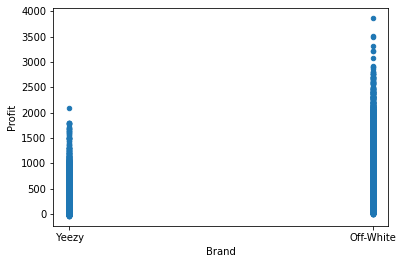

In [ ]:
df.plot.scatter(y= 'Profit', x= 'Brand')

In [ ]:
df['Time Until Sale'] = df['Order Date'] - df['Release Date']
df[['Brand','Sneaker Name', 'Profit', 'Shoe Size','Time Until Sale','Buyer Region']].sort_values('Profit', ascending=False).head(20)

,Brand,Sneaker Name,Profit,Shoe Size,Time Until Sale,Buyer Region
26870,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,3860.0,6.0,259 days,Wisconsin
43410,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,3510.0,6.5,335 days,New York
25935,Off-White,Air-Jordan-1-Retro-High-Off-White-University-Blue,3490.0,9.5,-38 days,New Jersey
47061,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,3310.0,6.5,355 days,New York
95189,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,3210.0,7.0,512 days,California
52620,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,3206.0,7.0,391 days,New York
49238,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,3085.0,8.5,375 days,California
95188,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,2910.0,8.0,512 days,California
93926,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,2896.0,7.5,507 days,New York
98905,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,2895.0,8.0,520 days,Illinois


In [ ]:
df[['Brand','Sneaker Name', 'Profit', 'Shoe Size','Time Until Sale','Buyer Region']].sort_values('Profit', ascending=False).tail(20)

,Brand,Sneaker Name,Profit,Shoe Size,Time Until Sale,Buyer Region
91862,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,-20.0,9.0,205 days,New York
57914,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,-20.0,9.0,123 days,Texas
57964,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,-20.0,9.0,123 days,New York
87767,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,-20.0,8.5,193 days,West Virginia
77921,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,-20.0,7.5,601 days,Missouri
59032,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,-20.0,12.0,558 days,Illinois
57912,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,-20.0,13.5,123 days,California
90998,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,-20.0,9.0,202 days,New York
60400,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,-20.0,7.5,566 days,California
88294,Yeezy,adidas-Yeezy-Boost-350-V2-Butter,-21.0,9.0,194 days,Maryland


**Is it possible to predict the sale price of a shoe at a given time? (i.e. when should I sell?)**

The months with highest orders ratio are between November to January, this means that this is the best time to sell sneakers.

In [ ]:
sales_per_month = df['Order Date'].dt.month.value_counts()
sales_per_month

12    22292
11    15489
1     14511
2      7774
7      7434
10     7307
8      6090
6      5431
9      4671
5      3456
4      2756
3      2745
Name: Order Date, dtype: int64

The best time to have profit is between september - December.

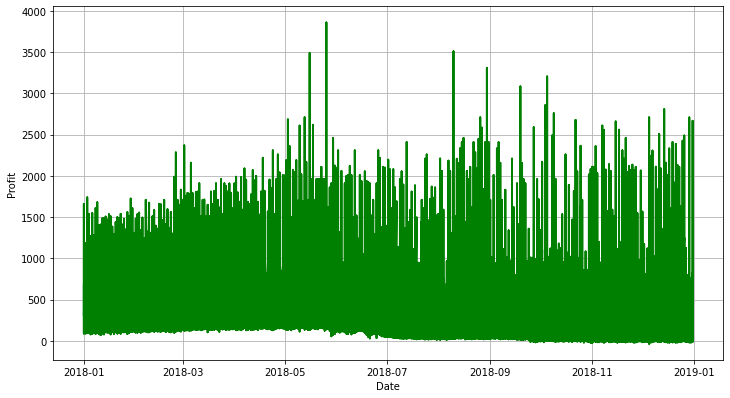

In [ ]:
datatime = df.loc[(df['Order Date'] >= '2018-01-01') & (df['Order Date'] <= '2018-12-31')]

plt.rcParams["figure.figsize"] = [12.00, 6.50]

plt.xlabel('Date')
plt.ylabel('Profit')

plt.plot(datatime['Order Date'], datatime['Profit'], color= 'g', linewidth=2)
plt.grid()

plt.show()